In [22]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_excel("Multiple Regression\DS4.xls",engine="xlrd")
df

*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


,X1,X2,X3,X4,X5
0,6.8,225,0.442,0.672,9.2
1,6.3,180,0.435,0.797,11.7
2,6.4,190,0.456,0.761,15.8
3,6.2,180,0.416,0.651,8.6
4,6.9,205,0.449,0.900,23.2
5,6.4,225,0.431,0.780,27.4
6,6.3,185,0.487,0.771,9.3
7,6.8,235,0.469,0.750,16.0
8,6.9,235,0.435,0.818,4.7
9,6.7,210,0.480,0.825,12.5


In [25]:
x = pd.DataFrame(df.iloc[:,:-1])
Y = pd.DataFrame(df.iloc[:,-1])
b = pd.DataFrame(np.ones(Y.count()))
x1 = [b,x]

In [26]:
X = pd.concat(x1,axis=1)
X_transpose = np.transpose(X)
Xt_X = X_transpose.dot(X)
xtx_inverse = np.linalg.inv(Xt_X)
Xt_Y = X_transpose.dot(Y)
B = xtx_inverse.dot(Xt_Y)
B

array([[ 4.14870671e+00],
       [-3.69049908e+00],
       [ 9.45845788e-03],
       [ 4.79401992e+01],
       [ 1.13710193e+01]])

In [27]:
for i in range(len(B)):
    print("a[",i,"] = ",B[i])

a[ 0 ] =  [4.14870671]
a[ 1 ] =  [-3.69049908]
a[ 2 ] =  [0.00945846]
a[ 3 ] =  [47.94019916]
a[ 4 ] =  [11.37101926]


In [28]:
X_Pred = 0
for i in range(1,len(B)):
    X_Pred += (B[i] * df['X'+str(i)])
X_Pred += B[0]
i += 1
df['X'+str(i)+'_Pred'] = X_Pred
df

,X1,X2,X3,X4,X5,X5_Pred
0,6.8,225,0.442,0.672,9.2,10.012359
1,6.3,180,0.435,0.797,11.7,12.517774
2,6.4,190,0.456,0.761,15.8,12.840696
3,6.2,180,0.416,0.651,8.6,10.315791
4,6.9,205,0.449,0.900,23.2,12.382314
5,6.4,225,0.431,0.780,27.4,12.189286
6,6.3,185,0.487,0.771,9.3,14.762310
7,6.8,235,0.469,0.750,16.0,12.288268
8,6.9,235,0.435,0.818,4.7,11.062481
9,6.7,210,0.480,0.825,12.5,13.801025


In [29]:
X_mean = df['X'+str(i)].mean()
a = df['X'+str(i)+'_Pred']- X_mean
b = df['X'+str(i)] - X_mean
a2 = a*a
b2 = b*b
r2 = a2.sum()/b2.sum()
print("Coefficient of Determination (R2) =", r2)

Coefficient of Determination (R2) = 0.22225063130015998


In [30]:
import math
c = df['X'+str(i)] - df['X'+str(i)+'_Pred']
c2 = c*c
d = c2.mean()
rmse = math.sqrt(d)
print("Root Mean Square Error (RMSE) =", rmse)

Root Mean Square Error (RMSE) = 5.154163684350698


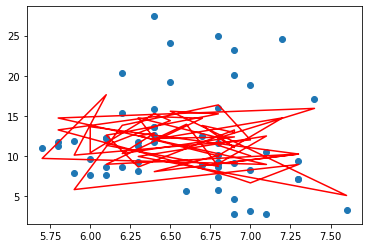

In [31]:
import matplotlib.pyplot as plt
plt.scatter(df['X1'],df['X'+str(i)])
plt.plot(df['X1'],df['X'+str(i)+'_Pred'],color='red')